In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
hcv_data = fetch_ucirepo(id=571) 
  
# data (as pandas dataframes) 
X: pd.DataFrame = hcv_data.data.features 
y: pd.DataFrame = hcv_data.data.targets 

full_data = pd.concat([X,y], axis = 1)
# # metadata 
# print(hcv_data.metadata) 
  
# # variable information 
# print(hcv_data.variables) 

In [3]:
full_data.columns

Index(['Age', 'Sex', 'ALB', 'ALP', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'CGT',
       'PROT', 'ALT', 'Category'],
      dtype='object')

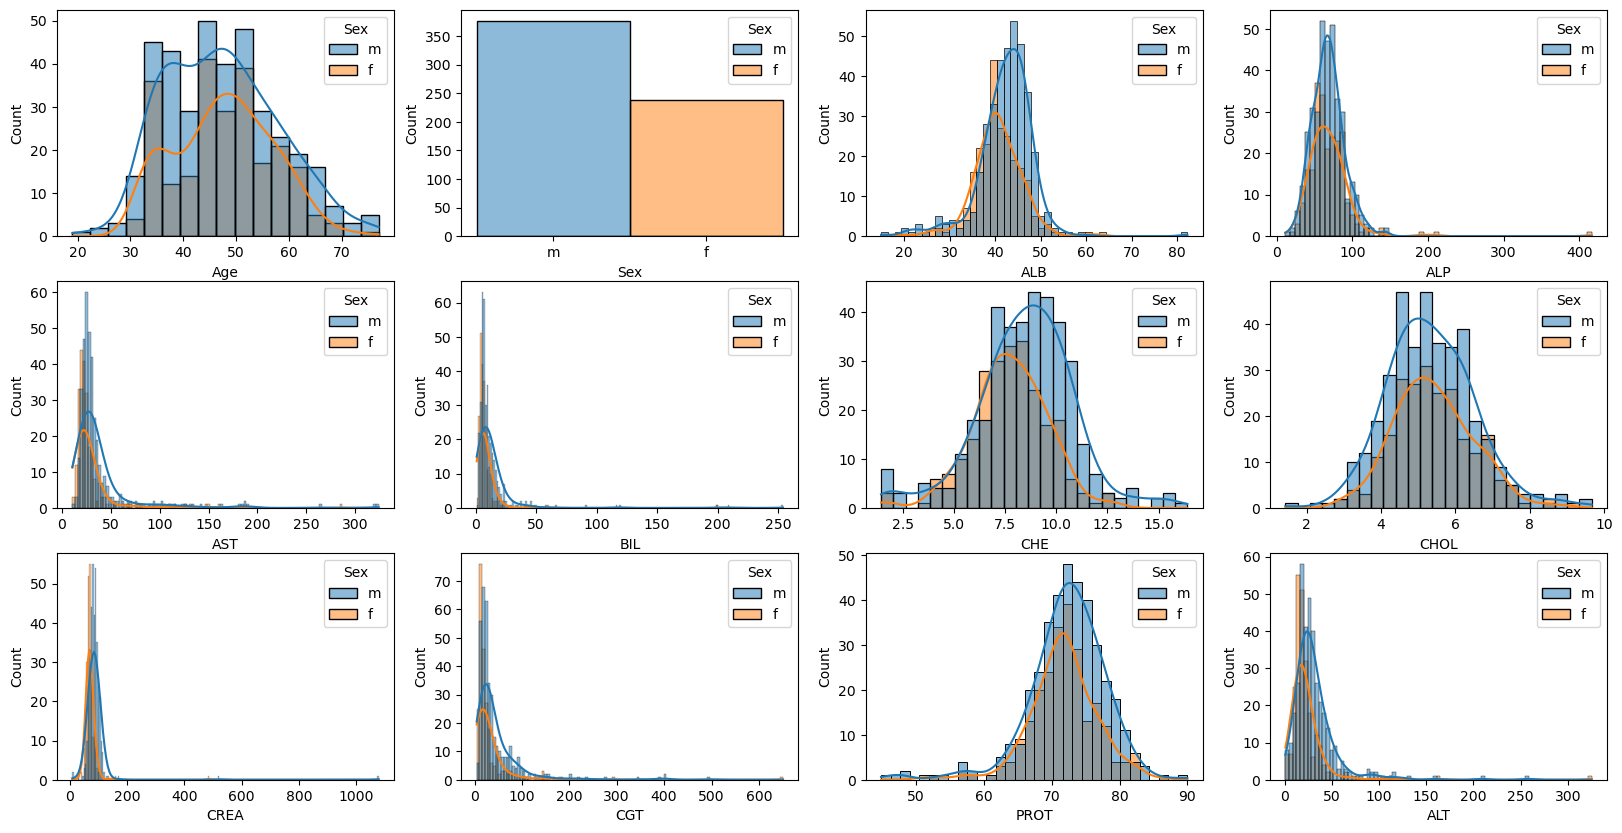

In [4]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 10))
axes = axes.flatten()
for i, col in enumerate(full_data.columns[:-1]):
    sns.histplot(data=full_data, x = col, kde = True, ax = axes[i], hue="Sex")

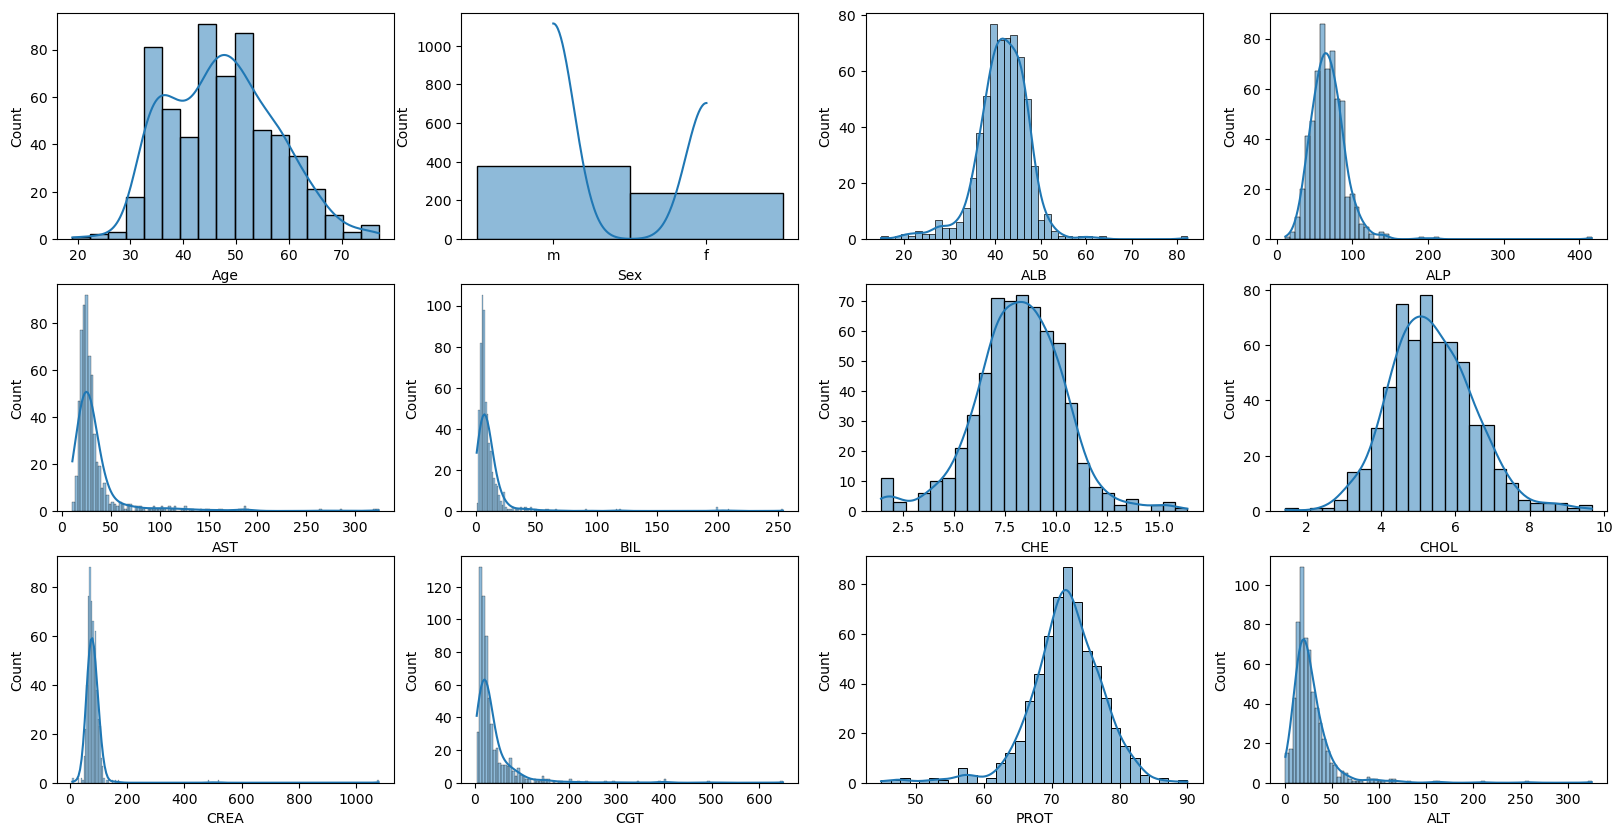

In [5]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20, 10))
axes = axes.flatten()
for i, col in enumerate(full_data.columns[:-1]):
    sns.histplot(data=full_data, x = col, kde = True, ax = axes[i])

In [6]:
# Cleaning up unwanted entries
full_data = full_data[full_data["Category"].str.contains("0s=suspect Blood Donor")==False]

In [7]:
# Coding caegorical data into numbers
full_data["Category"].replace(["0=Blood Donor", "1=Hepatitis", "2=Fibrosis", "3=Cirrhosis"],[0, 1, 2, 3], inplace=True)
full_data["Sex"].replace(['f','m'],[0, 1], inplace=True)

In [8]:
# saving data to csv

from operator import index


full_data.to_csv("data.csv", index=False)